In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATA

In [3]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

EDA

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [5]:
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Fuel_Type"]=le.fit_transform(df["Fuel_Type"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


In [12]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [13]:
df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [14]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


VISUALZATION

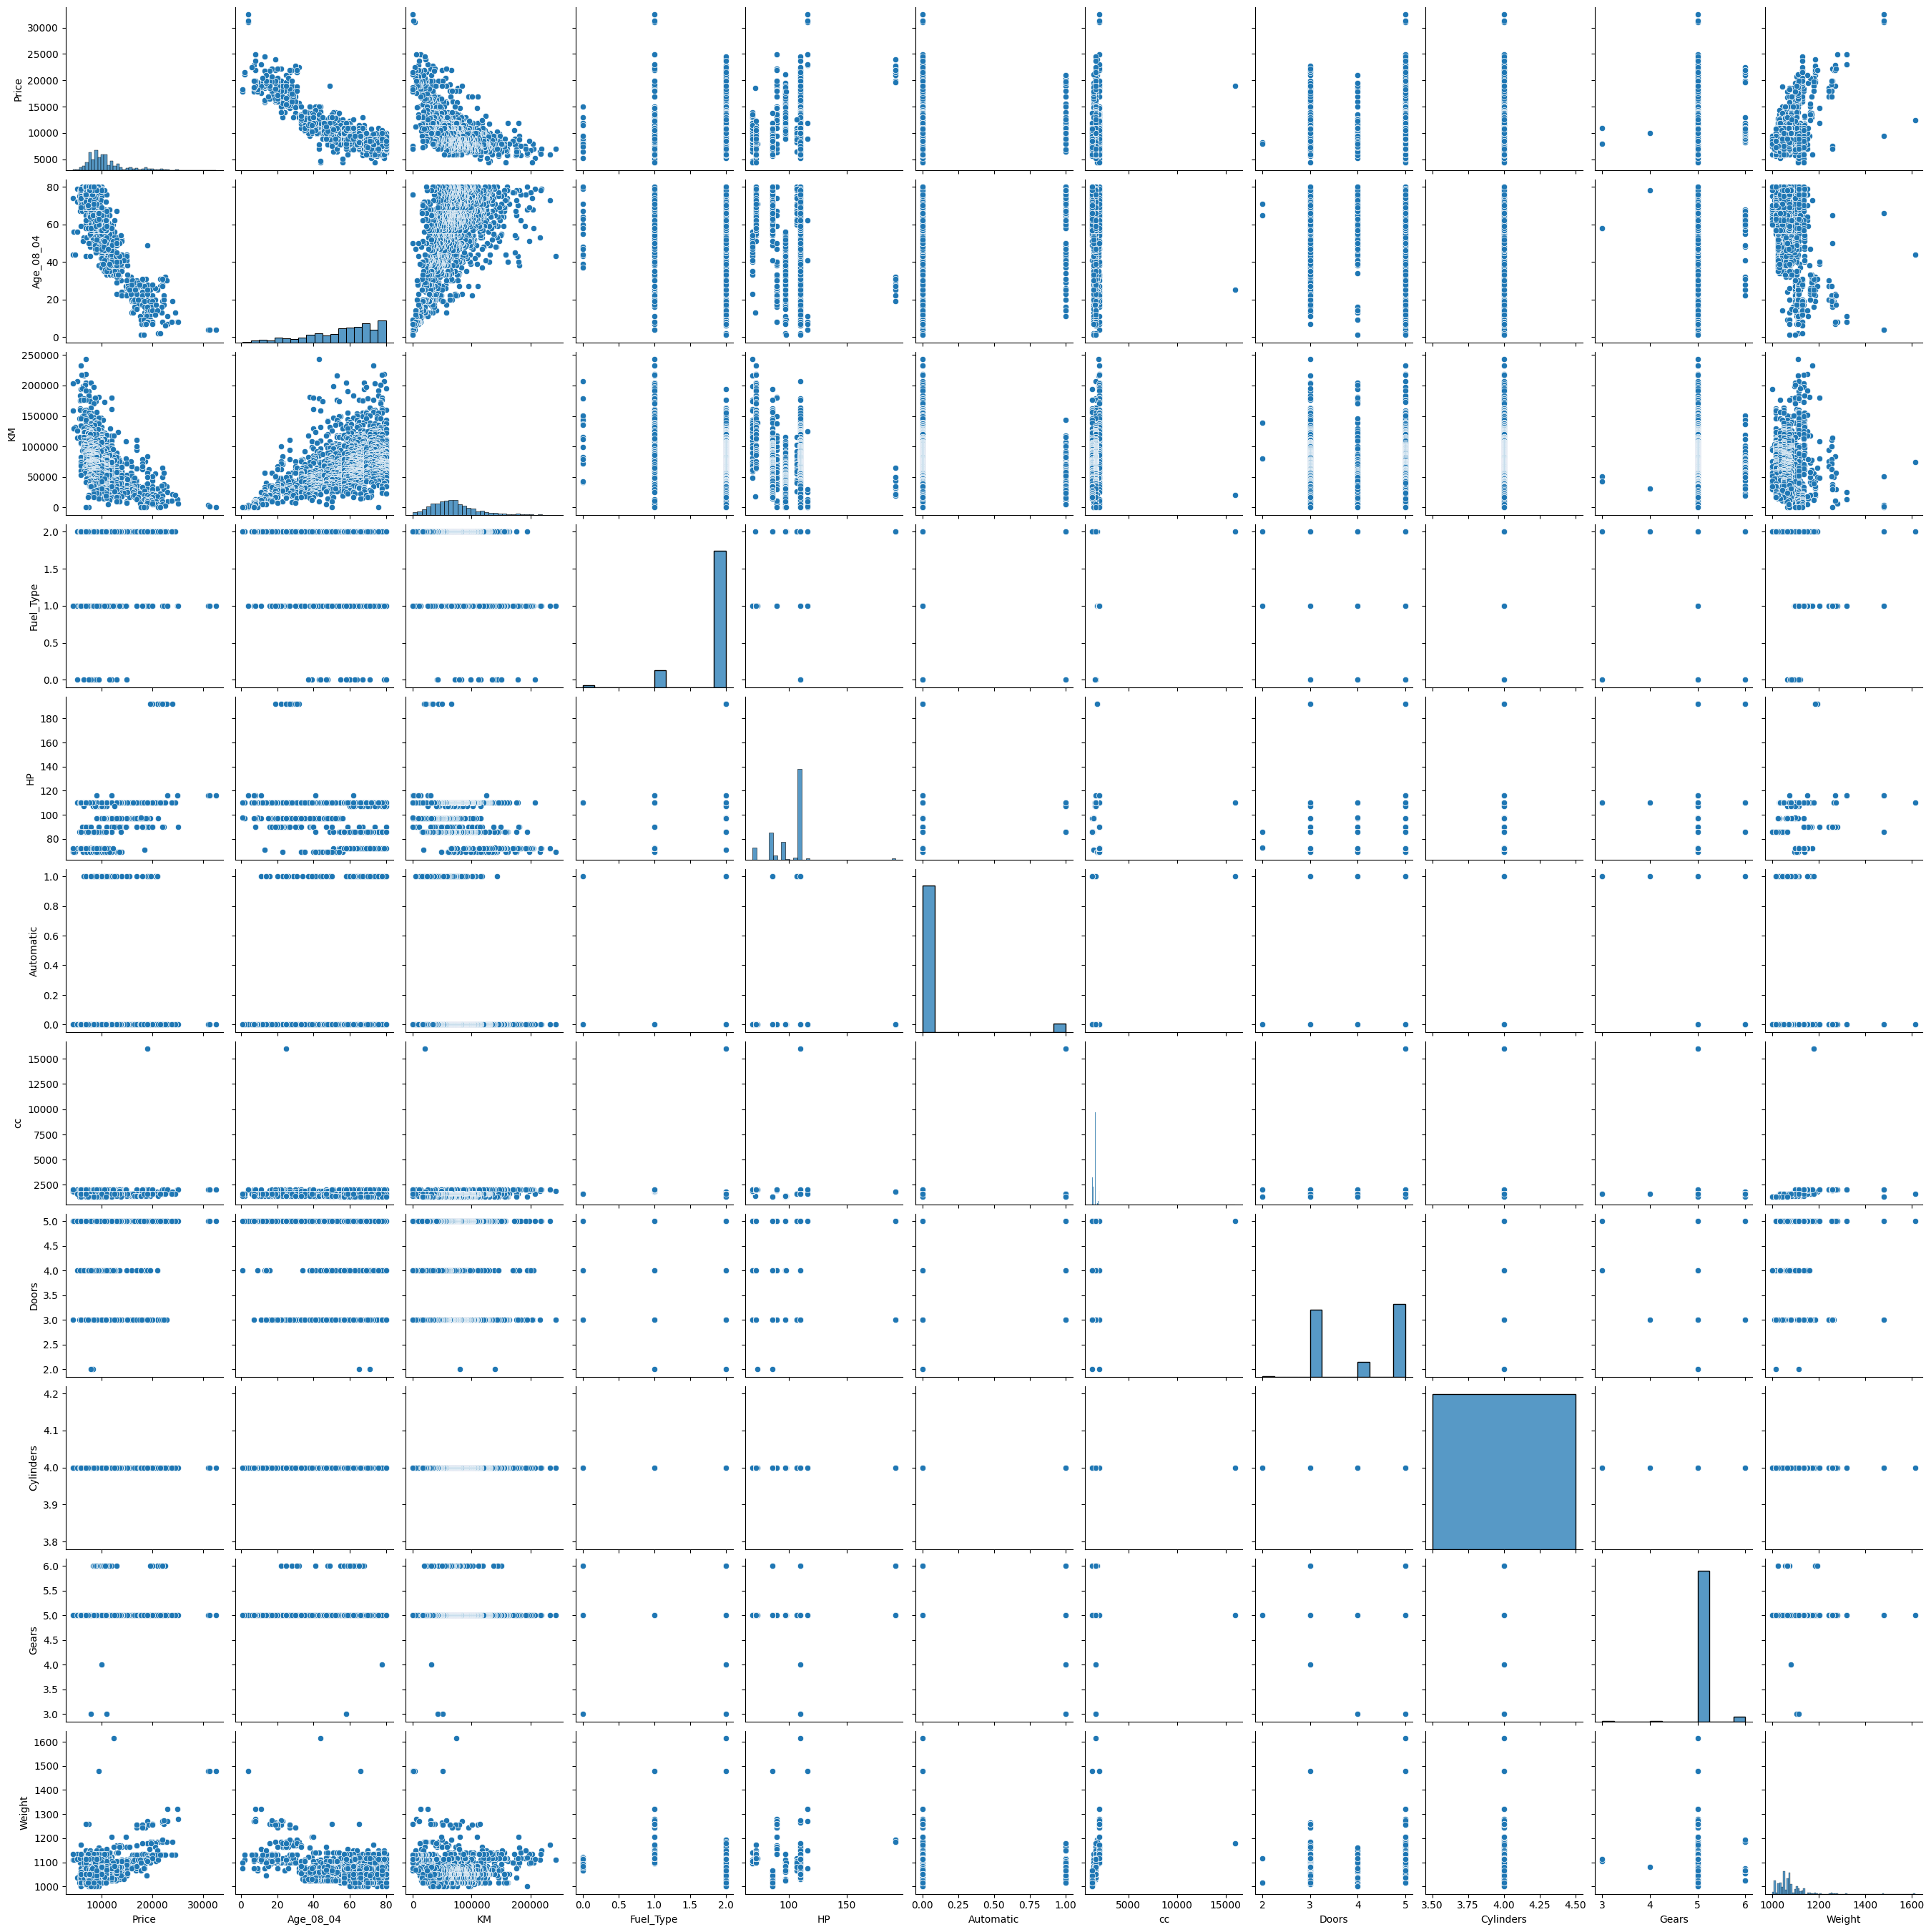

In [16]:
sns.pairplot(df)

<Axes: >

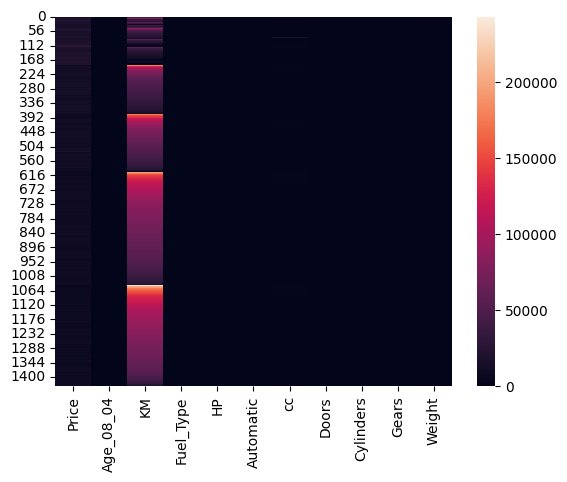

In [18]:
sns.heatmap(df)

<Axes: >

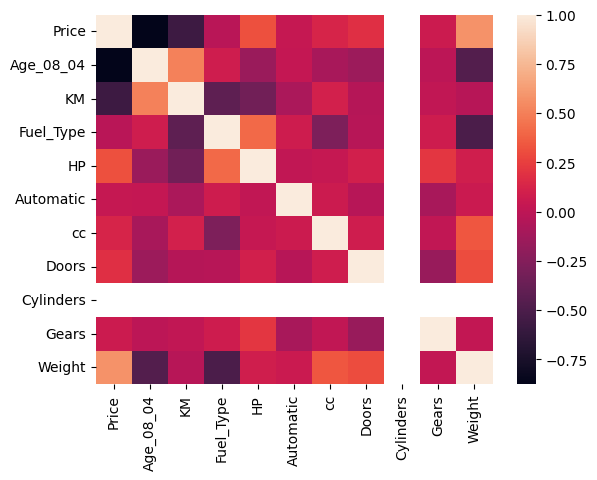

In [19]:
sns.heatmap(df.corr())

In [ ]:
# From the pairplot, we can see that Price has a positive correlation with Age, KM, HP, and CC.
# It has a negative correlation with Doors.
# From the heatmap, we can see that Price is highly correlated with Age, KM, and HP.
# It is also moderately correlated with CC and Weight.
# The heatmap also shows that there is a high correlation between Age and KM.

<Axes: title={'center': 'Age_08_04'}, ylabel='Frequency'>

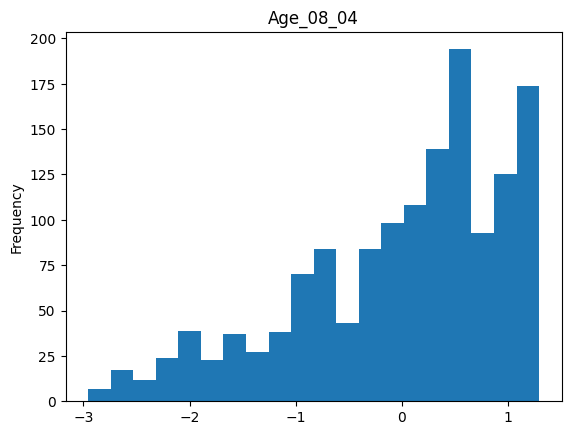

In [25]:
df['Age_08_04'].plot(kind='hist', bins=20, title='Age_08_04')

<Axes: xlabel='Fuel_Type', ylabel='Price'>

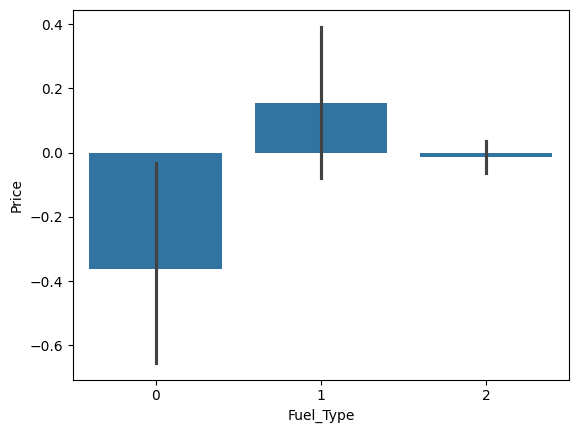

In [26]:
sns.barplot(x='Fuel_Type', y='Price', data=df)

<Axes: xlabel='Fuel_Type', ylabel='HP'>

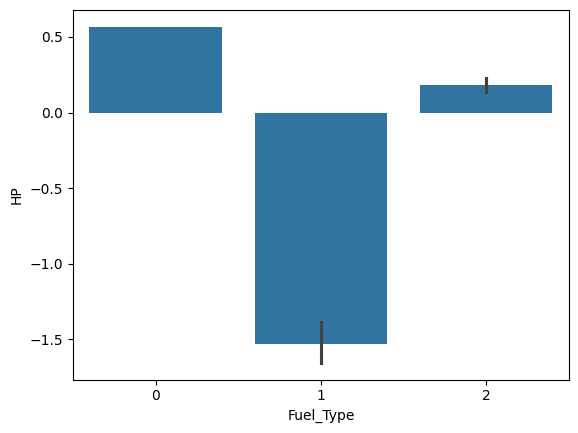

In [27]:
sns.barplot(x='Fuel_Type', y='HP', data=df)

SCALING FEATURES

In [22]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Price','Age_08_04', 'KM', 'HP', 'cc', 'Weight']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.763763,-1.771966,-0.574695,1,-0.768042,0,0.997419,3,4,5,1.758561
1,0.832715,-1.771966,0.117454,1,-0.768042,0,0.997419,3,4,5,1.758561
2,0.887877,-1.718184,-0.715386,1,-0.768042,0,0.997419,3,4,5,1.758561
3,1.163685,-1.610620,-0.547650,1,-0.768042,0,0.997419,3,4,5,1.758561
4,0.832715,-1.395491,-0.801028,1,-0.768042,0,0.997419,3,4,5,1.853577


In [23]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.763763,-1.771966,-0.574695,1,-0.768042,0,0.997419,3,4,5,1.758561
1,0.832715,-1.771966,0.117454,1,-0.768042,0,0.997419,3,4,5,1.758561
2,0.887877,-1.718184,-0.715386,1,-0.768042,0,0.997419,3,4,5,1.758561
3,1.163685,-1.610620,-0.547650,1,-0.768042,0,0.997419,3,4,5,1.758561
4,0.832715,-1.395491,-0.801028,1,-0.768042,0,0.997419,3,4,5,1.853577


SPLITTING DATA

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_data, test_data=train_test_split(df,test_size=0.2,random_state=42)

In [32]:
train_data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
899,-0.339472,0.325540,-0.246397,2,-1.035138,0,-0.652594,5,4,5,-0.711851
881,-0.258109,0.648233,-0.185773,2,0.567440,0,0.054555,4,4,5,-0.711851
310,0.612068,-0.857669,-0.796947,2,0.567440,0,0.054555,5,4,5,0.143291
1145,-1.180689,1.024708,0.888736,2,0.567440,0,0.054555,5,4,5,-0.046740
31,1.384332,-1.825749,-0.889070,2,-0.300623,0,-0.416878,3,4,5,0.523355
...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.056575,1.078490,1.526796,2,0.567440,0,0.054555,3,4,5,-0.426804
1130,-0.766976,0.917144,1.028841,2,0.567440,0,0.054555,3,4,5,-0.426804
1294,-1.042784,1.293619,0.085528,2,0.567440,0,0.054555,5,4,5,-0.046740
860,-0.270520,0.379322,-0.102505,2,-1.035138,0,-0.652594,3,4,5,-0.996899


In [33]:
test_data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
594,0.019079,-0.319847,-1.227770,2,-0.300623,0,-0.416878,3,4,5,-0.901883
754,-0.215358,0.648233,0.317196,2,0.567440,0,0.054555,3,4,5,-0.331788
630,-0.891089,0.164193,1.639402,1,-1.969976,0,0.997419,4,4,5,1.188466
1259,-0.408424,0.809579,0.199148,2,0.567440,0,0.054555,5,4,5,-0.046740
903,-0.270520,0.486886,-0.254265,2,0.567440,0,0.054555,5,4,5,0.048275
...,...,...,...,...,...,...,...,...,...,...,...
174,3.094346,-2.578699,-1.566817,2,0.567440,0,0.054555,5,4,5,1.093450
1428,-0.629071,0.863362,-1.134420,2,-1.035138,0,-0.652594,3,4,5,-1.091915
297,0.584487,-0.857669,-0.725308,2,0.567440,0,0.054555,5,4,5,0.143291
1435,-1.042784,1.078490,-1.827849,2,0.567440,0,0.054555,5,4,5,0.789399


MODEL BUILDING

In [36]:
import statsmodels.formula.api as smf

In [43]:
formula = 'Price ~ Age_08_04 + KM + HP + Automatic + cc + Doors + Weight + Fuel_Type'

In [38]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [44]:
model = smf.ols(formula=formula, data=train_data).fit()

In [45]:
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7d106e509e70>>


In [47]:
y_test = test_data['Price']
X_test = test_data.drop('Price', axis=1)

PREDECTING VALUES

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred

594     0.126736
754    -0.469468
630    -0.373203
1259   -0.484629
903    -0.173024
          ...   
174     2.321876
1428   -0.756530
297     0.777816
1435   -0.015177
1009   -0.001701
Length: 288, dtype: float64

EVALUATING THE PERFORMANCE

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mse = mean_squared_error(y_test, y_pred)

In [55]:
mse

0.16123476118537217

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2 = r2_score(y_test, y_pred)

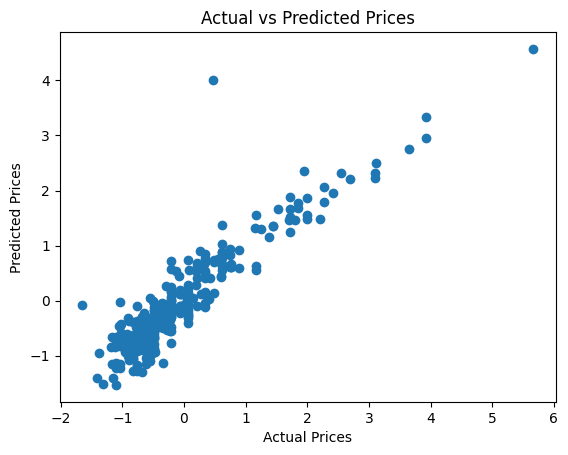

In [60]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

INTERVIEW QUESTIONS
1.
a)What is Normalization & Standardization?

1.   Normalization scales the data to a range of [0, 1].
2.   Standardization scales the data to have a mean of 0 and a standard deviation of 1



2.What techniques can be used to address multicollinearity in multiple linear regression?
1. Remove highly correlated predictors.
2. Use Variance Inflation Factor (VIF) to identify multicollinearity.
3. Apply regularization methods such as Ridge or Lasso regression.